<a href="https://colab.research.google.com/github/shuchimishra/Tensorflow_projects/blob/main/Tensorflow_Code/CNN/exam/Category3_beans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 112, 112, 256)     7168      
                                                                 
 max_pooling2d (MaxPooling2  (None, 56, 56, 256)       0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 56, 56, 256)       1024      
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 54, 54, 256)       590080    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 27, 27, 256)       0         
 g2D)                                                            
                                                        

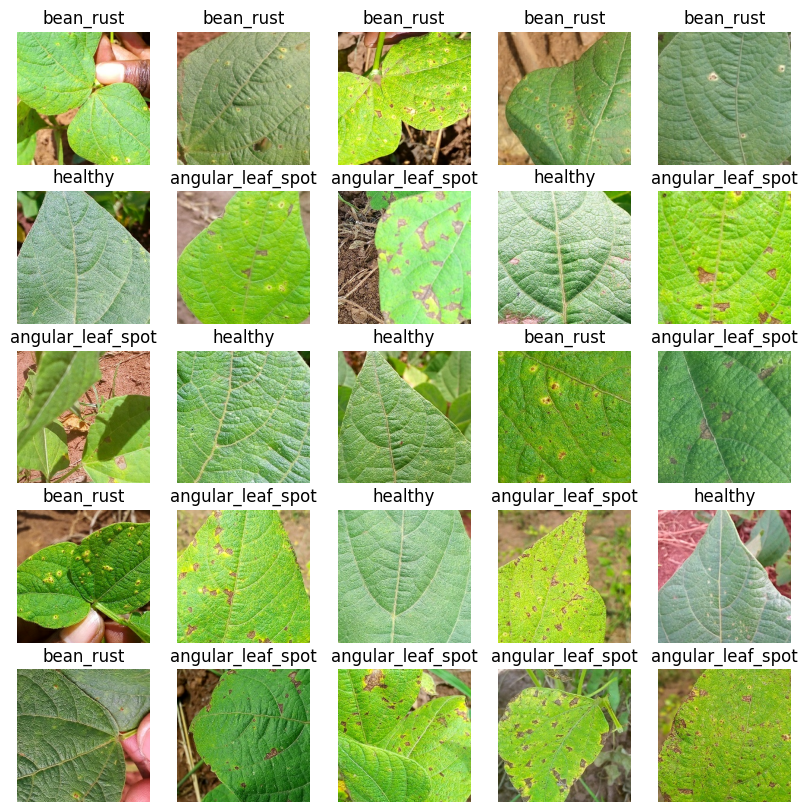

In [2]:
# ======================================================================
# There are 5 questions in this exam with increasing difficulty from 1-5.
# Please note that the weight of the grade for the question is relative
# to its difficulty. So your Category 1 question will score significantly
# less than your Category 5 question.
#
# Don't use lambda layers in your model.
# You do not need them to solve the question.
# Lambda layers are not supported by the grading infrastructure.
#
# You must use the Submit and Test button to submit your model
# at least once in this category before you finally submit your exam,
# otherwise you will score zero for this category.
# ======================================================================
#
# Computer Vision with CNNs
# For this exercise you will use the beans dataset from TFDS
# to build a classifier that recognizes different types of bean disease
# Please make sure you keep the given layers as shown, or your submission
# will fail to be graded. Please also note the image size of 224x224


import tensorflow as tf
import tensorflow_datasets as tfds
# tfds.disable_progress_bar()
from tensorflow import keras
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import numpy as np

def map_data(image, label, target_height=224, target_width=224):
    """Normalizes images: `uint8` -> `float32` and resizes images
    by keeping the aspect ratio the same without distortion."""
    image = tf.cast(image, tf.float32) / 255.0  # Normalize the image
    image = tf.image.resize_with_crop_or_pad(image, target_height, target_width)  # Resize the image
    return image, label

def solution_model():

  #Load the data
  (train_ds, val_ds, test_ds), ds_info = tfds.load(
      name='beans',
      split=['train[:80%]', 'train[80%:90%]', 'train[90%:]'],
      as_supervised=True,
      with_info=True)

  #Derive labels count and names
  num_classes = ds_info.features['label'].num_classes
  class_names = ds_info.features['label'].names

  #Apply preprocessing functions
  train_ds = train_ds.map(map_data)
  train_ds = train_ds.shuffle(buffer_size=1000).batch(32).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

  val_ds = val_ds.map(map_data)
  val_ds = val_ds.batch(32).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

  test_ds = test_ds.map(map_data)
  test_ds = test_ds.batch(32).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

  #Visualize data
  plt.figure(figsize=(10, 10))
  for images, labels in train_ds.take(1):
    for i in range(25):
      ax = plt.subplot(5, 5, i + 1)
      plt.imshow(images[i]) #.numpy().astype("uint8")
      # label = np.argmax(labels[i], axis=0) #convert one hot encoded label to int value
      plt.title(class_names[labels[i]])
      plt.axis("off")

  #Define model
  model = tf.keras.models.Sequential([
      tf.keras.layers.Conv2D(256, (3, 3), input_shape=(224, 224, 3), activation='relu', strides=2, padding='same'),
      tf.keras.layers.MaxPooling2D((2, 2)),
      tf.keras.layers.BatchNormalization(),
      tf.keras.layers.Conv2D(256, (3, 3), activation='relu'),
      tf.keras.layers.MaxPooling2D((2, 2)),
      tf.keras.layers.Conv2D(256, (3, 3), activation='relu'),
      tf.keras.layers.MaxPooling2D((2, 2)),
      tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
      tf.keras.layers.MaxPooling2D((2, 2)),
      # tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
      # tf.keras.layers.MaxPooling2D((2, 2)),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(128, activation='relu'),
      tf.keras.layers.Dense(num_classes, activation='softmax')
  ])

  model.summary()

  #callbacks
  MCP = keras.callbacks.ModelCheckpoint(filepath='bestmodel.h5',monitor='val_accuracy', mode='auto',save_best_only=True,save_weights_only=False,verbose=1)
  RLP = keras.callbacks.ReduceLROnPlateau(monitor="val_accuracy",factor=0.1,patience=3, verbose=1,mode="auto",min_lr=0.000000001)
  ES = keras.callbacks.EarlyStopping(monitor='val_accuracy',min_delta=1e-4,patience=8,verbose=1,start_from_epoch=10)

  #Train and compile model
  lr = 0.0001
  optimizer = tf.keras.optimizers.Adam(learning_rate=lr, clipnorm=1)
  model.compile(optimizer=optimizer,loss='sparse_categorical_crossentropy', metrics=['accuracy'])

  tf.keras.backend.clear_session()
  history = model.fit(train_ds, epochs=100, verbose = 1, validation_data=val_ds, callbacks=[MCP,RLP,ES]) #,ES

  #Evaluate model
  model.evaluate(test_ds)

  return model

if __name__ == '__main__':
    model = solution_model()
    model.save("mymodel.h5")

In [1]:
# import tensorflow as tf
# import tensorflow_datasets as tfds
# # tfds.disable_progress_bar()
# from tensorflow import keras
# import warnings
# warnings.filterwarnings('ignore')
# import matplotlib.pyplot as plt
# import numpy as np

In [2]:
# def map_data(image, label, target_height=224, target_width=224):
#     """Normalizes images: `uint8` -> `float32` and resizes images
#     by keeping the aspect ratio the same without distortion."""
#     image = tf.cast(image, tf.float32) / 255.0  # Normalize the image
#     image = tf.image.resize_with_crop_or_pad(image, target_height, target_width)  # Resize the image
#     return image, label

In [3]:
# (train_ds, val_ds, test_ds), ds_info = tfds.load(
#       name='beans',
#       split=['train[:80%]', 'train[80%:90%]', 'train[90%:]'],
#       as_supervised=True,
#       with_info=True
#   )

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/1034 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/beans/0.1.0.incompleteFCAQNB/beans-train.tfrecord*...:   0%|          | 0/…

Generating validation examples...:   0%|          | 0/133 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/beans/0.1.0.incompleteFCAQNB/beans-validation.tfrecord*...:   0%|         …

Generating test examples...:   0%|          | 0/128 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/beans/0.1.0.incompleteFCAQNB/beans-test.tfrecord*...:   0%|          | 0/1…

Dataset beans downloaded and prepared to /root/tensorflow_datasets/beans/0.1.0. Subsequent calls will reuse this data.


In [4]:
# num_classes = ds_info.features['label'].num_classes
# class_names = ds_info.features['label'].names

In [5]:
# print(train_ds)

<_PrefetchDataset element_spec=(TensorSpec(shape=(500, 500, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>


In [6]:
# train_ds = train_ds.map(map_data)
# train_ds = train_ds.shuffle(buffer_size=1000).batch(32).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

# val_ds = val_ds.map(map_data)
# val_ds = val_ds.batch(32).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

# test_ds = test_ds.map(map_data)
# test_ds = test_ds.batch(32).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

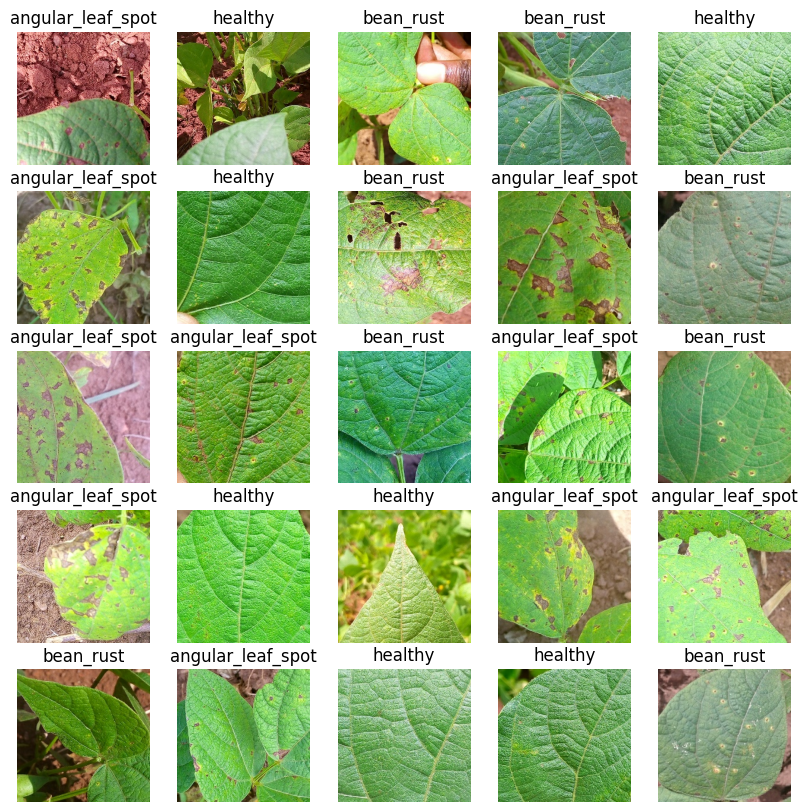

In [7]:
# plt.figure(figsize=(10, 10))
# for images, labels in train_ds.take(1):
#   for i in range(25):
#     ax = plt.subplot(5, 5, i + 1)
#     plt.imshow(images[i]) #.numpy().astype("uint8")
#     # label = np.argmax(labels[i], axis=0) #convert one hot encoded label to int value
#     plt.title(class_names[labels[i]])
#     plt.axis("off")

In [85]:
# model = tf.keras.models.Sequential([
#         tf.keras.layers.Conv2D(256, (3, 3), input_shape=(224, 224, 3), activation='relu', strides=2, padding='same'),
#         tf.keras.layers.MaxPooling2D((2, 2)),
#         tf.keras.layers.BatchNormalization(),
#         tf.keras.layers.Conv2D(256, (3, 3), activation='relu'),
#         tf.keras.layers.MaxPooling2D((2, 2)),
#         tf.keras.layers.Conv2D(256, (3, 3), activation='relu'),
#         tf.keras.layers.MaxPooling2D((2, 2)),
#         tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
#         tf.keras.layers.MaxPooling2D((2, 2)),
#         # tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
#         # tf.keras.layers.MaxPooling2D((2, 2)),
#         tf.keras.layers.Flatten(),
#         tf.keras.layers.Dense(128, activation='relu'),
#         tf.keras.layers.Dense(num_classes, activation='softmax')
#     ])

# model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 112, 112, 256)     7168      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 56, 56, 256)       0         
 g2D)                                                            
                                                                 
 batch_normalization_1 (Bat  (None, 56, 56, 256)       1024      
 chNormalization)                                                
                                                                 
 conv2d_6 (Conv2D)           (None, 54, 54, 256)       590080    
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 27, 27, 256)       0         
 g2D)                                                            
                                                      

In [95]:
# #callbacks
# MCP = keras.callbacks.ModelCheckpoint(filepath='bestmodel.h5',monitor='val_accuracy',
#                                       mode='auto',save_best_only=True,save_weights_only=False,verbose=1)
# RLP = keras.callbacks.ReduceLROnPlateau(monitor="val_accuracy",factor=0.1,patience=3,
#                                         verbose=1,mode="auto",min_lr=0.000000001)
# ES = keras.callbacks.EarlyStopping(monitor='val_accuracy',min_delta=1e-4,patience=5,verbose=1,start_from_epoch=10)

In [96]:
# lr = 0.0001
# optimizer = tf.keras.optimizers.Adam(learning_rate=lr, clipnorm=1)
# model.compile(optimizer=optimizer,loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [97]:
# tf.keras.backend.clear_session()
# history = model.fit(train_ds, epochs=100, verbose = 1, validation_data=val_ds, callbacks=[MCP,RLP,ES]) #,ES

Epoch 1/100
25/26 [===========================>..] - ETA: 0s - loss: 0.0628 - accuracy: 0.9787
Epoch 1: val_accuracy improved from -inf to 0.75000, saving model to bestmodel.h5
26/26 [==============================] - 4s 86ms/step - loss: 0.0613 - accuracy: 0.9794 - val_loss: 0.8398 - val_accuracy: 0.7500 - lr: 1.0000e-04
Epoch 2/100
25/26 [===========================>..] - ETA: 0s - loss: 0.0280 - accuracy: 0.9937
Epoch 2: val_accuracy improved from 0.75000 to 0.76923, saving model to bestmodel.h5
26/26 [==============================] - 2s 63ms/step - loss: 0.0286 - accuracy: 0.9927 - val_loss: 0.8647 - val_accuracy: 0.7692 - lr: 1.0000e-04
Epoch 3/100
25/26 [===========================>..] - ETA: 0s - loss: 0.0255 - accuracy: 0.9950
Epoch 3: val_accuracy improved from 0.76923 to 0.77885, saving model to bestmodel.h5
26/26 [==============================] - 2s 63ms/step - loss: 0.0259 - accuracy: 0.9952 - val_loss: 0.8266 - val_accuracy: 0.7788 - lr: 1.0000e-04
Epoch 4/100
25/26 [===

In [100]:
# model.evaluate(test_ds)

4/4 [==============================] - 0s 18ms/step - loss: 1.0302 - accuracy: 0.7864


[1.0302278995513916, 0.7864077687263489]